# Project 1: General Exploratory Data Analysis (EDA)

In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set_style('darkgrid')
sns.set_palette('Set2')
%matplotlib inline

##  Load the Dataset

In [42]:
file_path = 'Sample - Superstore.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,03-01-2013,07-01-2013,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,04-01-2013,08-01-2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2011-112326,04-01-2013,08-01-2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2011-112326,04-01-2013,08-01-2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2011-141817,05-01-2013,12-01-2013,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## Data Cleaning

###  Check for Missing Values

In [4]:
print('Missing Values before handling:\n', data.isnull().sum())

Missing Values before handling:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      61
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


### Remove Duplicates

In [5]:
initial_row_count = data.shape[0]
data.drop_duplicates(inplace=True)
final_row_count = data.shape[0]
print(f'Duplicates removed: {initial_row_count - final_row_count}')

Duplicates removed: 55515


### Handle Missing Values

In [6]:
# Fill missing values in Postal Code with the mode of their respective regions
data['Postal Code'] = data.groupby('Region')['Postal Code'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0)
)
print('Missing Values after handling:\n', data.isnull().sum())


Missing Values after handling:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


### Save the Cleaned Dataset

In [15]:
data.to_csv('cleaned_data.csv', index=False)
print('Data cleaning completed and saved to cleaned_data.csv')

Data cleaning completed and saved to cleaned_data.csv


## Outlier Detection and Handling


In [7]:
# Detecting outliers using IQR
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print('Outliers have been handled')

Outliers have been handled


## Statistical Analysis

### Statistical Summary

In [8]:
print('\nStatistical Summary:\n', data.describe())


Statistical Summary:
             Row ID   Postal Code        Sales     Quantity     Discount  \
count  6778.000000   6778.000000  6778.000000  6778.000000  6778.000000   
mean   4993.174093  55724.154470    68.064725     3.372971     0.096192   
std    2882.797005  32813.463601    85.793546     1.867340     0.105149   
min       1.000000   1453.000000     0.990000     1.000000     0.000000   
25%    2497.500000  22204.000000    14.940000     2.000000     0.000000   
50%    5020.500000  55901.000000    34.854000     3.000000     0.000000   
75%    7463.500000  90036.000000    83.984000     4.000000     0.200000   
max    9993.000000  99301.000000   496.860000     9.000000     0.500000   

            Profit  
count  6778.000000  
mean     11.686369  
std      13.520927  
min     -26.875800  
25%       3.246300  
50%       7.946900  
75%      17.745000  
max      53.270400  


### Correlation Matrix

In [10]:
print('\nCorrelation Matrix:')
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
print(numeric_data.corr())


Correlation Matrix:
               Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.015258  0.005332  0.000712  0.005014 -0.005145
Postal Code  0.015258     1.000000  0.071508  0.012762  0.072082  0.005327
Sales        0.005332     0.071508  1.000000  0.113796  0.142545  0.398133
Quantity     0.000712     0.012762  0.113796  1.000000 -0.024930  0.238200
Discount     0.005014     0.072082  0.142545 -0.024930  1.000000 -0.277930
Profit      -0.005145     0.005327  0.398133  0.238200 -0.277930  1.000000


## Data Visualization

###  Histograms

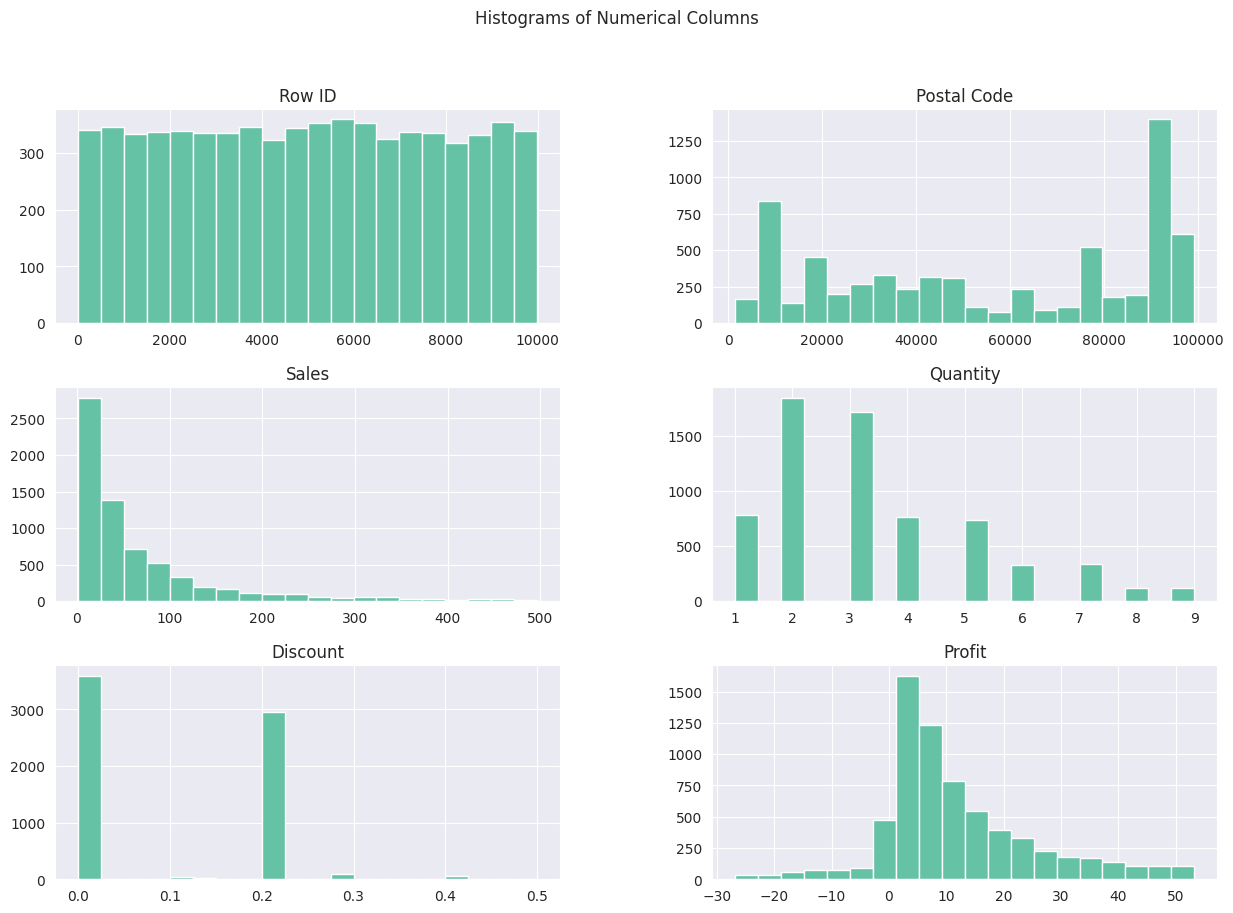

In [11]:
data.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Columns')
plt.show()

### Boxplots for Outlier Detection

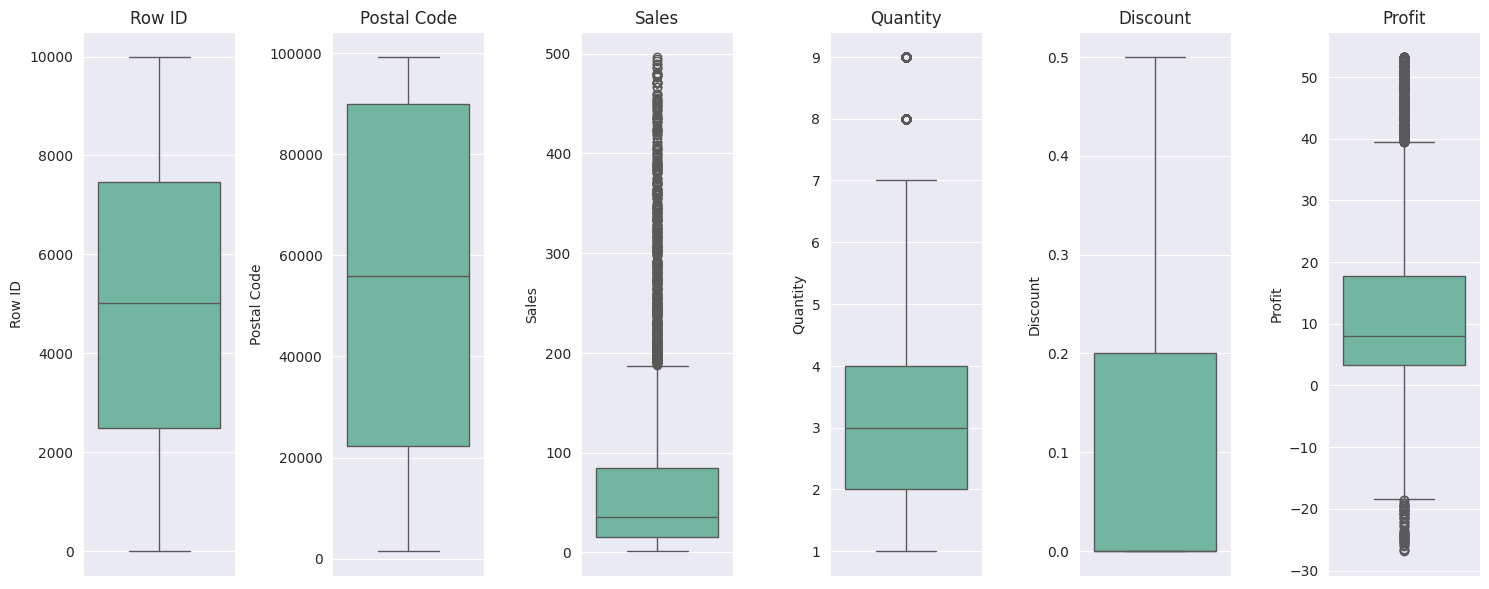

In [12]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Heatmap for Correlation

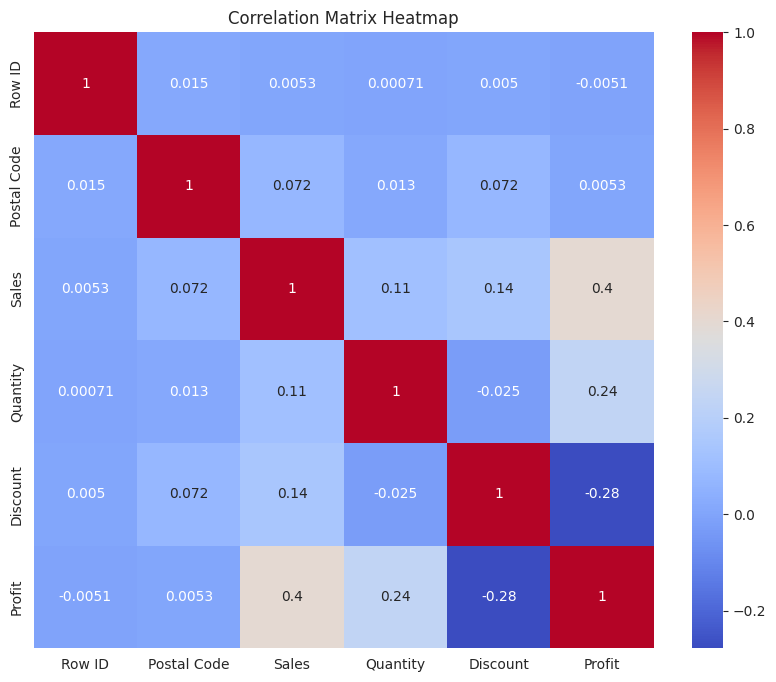

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Project 2: Sales Performance Analysis

## Load and Explore the Dataset

In [16]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Sample - Superstore.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# View the shape of the dataset
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)


Dataset shape: (65535, 21)

Missing values:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      61
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

Data types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit  

## Data Cleaning

### Remove Duplicates

In [17]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]
print(f"\nDuplicates removed: {initial_rows - final_rows}")



Duplicates removed: 55515


### Fill Missing Values

In [19]:
df['Postal Code'] = df['Postal Code'].fillna(
    df.groupby('Region')['Postal Code'].transform(lambda x: x.fillna(x.median()))
)

# If still any nulls remain, fill with overall median
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].median())

print("\nMissing values after filling:\n", df.isnull().sum())



Missing values after filling:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


### Convert Date Column

In [43]:
# Convert 'Order Date' to datetime format for trend analysis
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Optional: Check if conversion was successful
print("\nConverted 'Order Date' data type:", df['Order Date'].dtype)


Converted 'Order Date' data type: datetime64[ns]


## Exploratory Data Analysis (EDA)

###  Sales Trends Over Time (Line Chart)

<Figure size 1200x600 with 0 Axes>

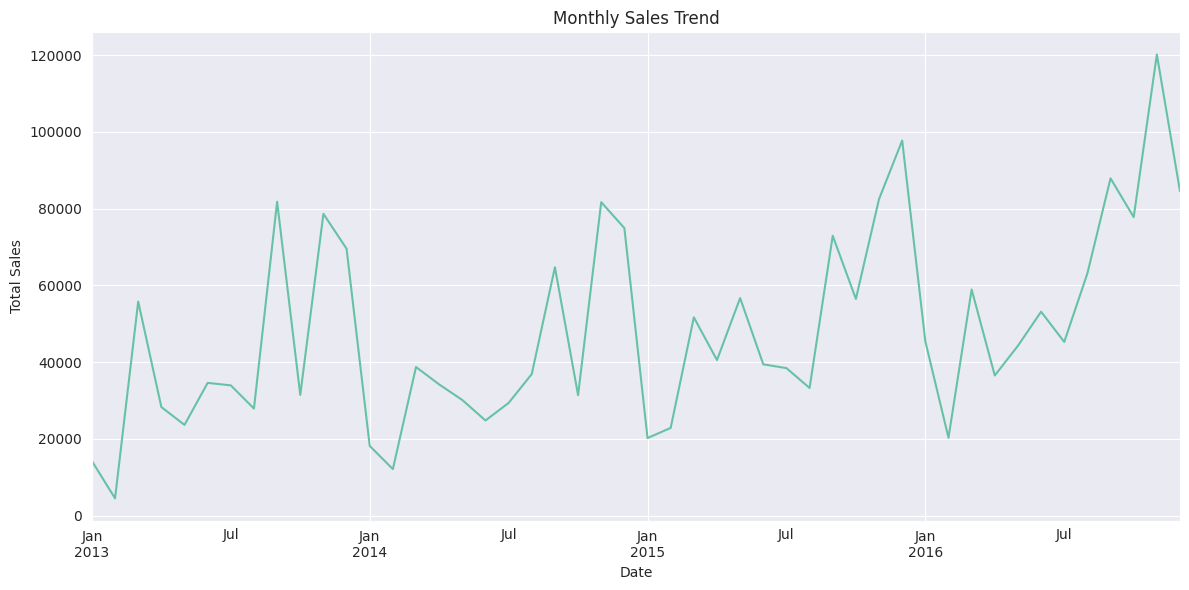

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))

monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


### Profit vs. Discount (Scatter Plot)

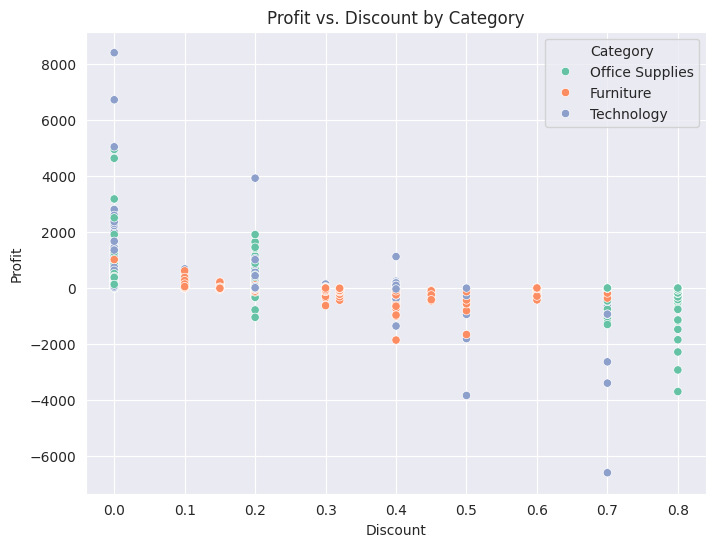

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Profit vs. Discount by Category')
plt.show()


### Sales Distribution by Region (Bar Plot)

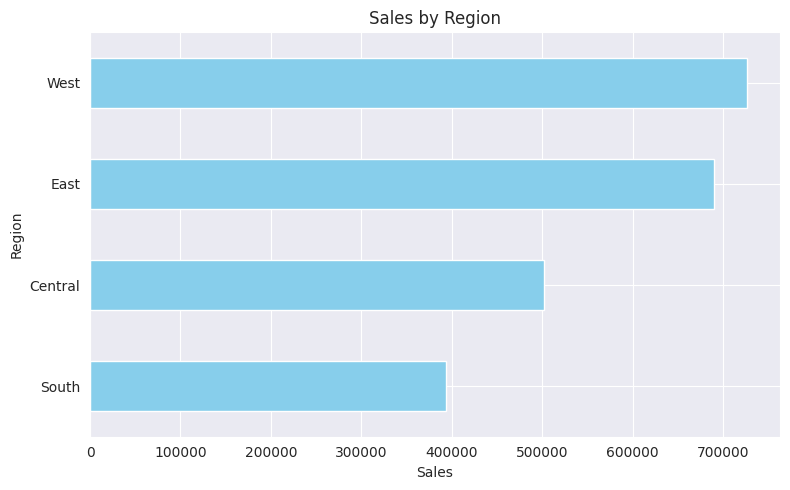

In [24]:
plt.figure(figsize=(8, 5))
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='barh', color='skyblue')
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


### Sales Distribution by Category (Pie Chart)

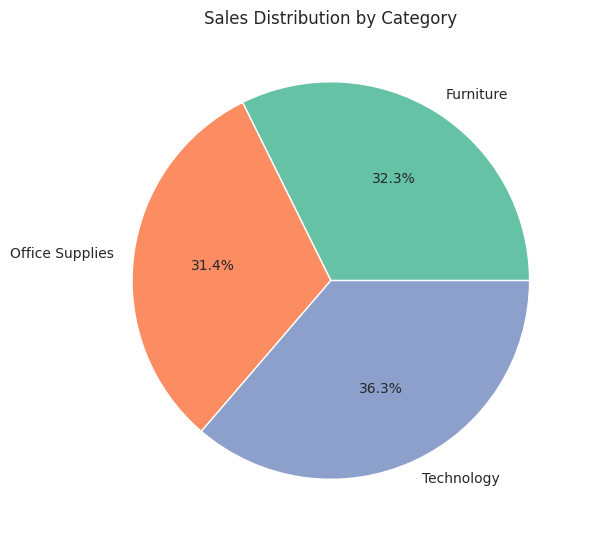

In [25]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()


## Predictive Modeling

### Train a Linear Regression Model

Predict sales using Profit and Discount as features

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['Profit', 'Discount']]
y = df['Sales']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)



### Evaluate model performance

In [45]:

print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

R² Score: 0.15
Mean Squared Error: 233312.54
